In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [4]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

20156

In [5]:
df = df[df['NewDateTime']>= '2021-03-01'].copy()
len(df)

7479

In [6]:
# df.drop(df.head(len(df)%168).index,inplace=True)
# len(df)

In [7]:
viewdata = 168*3
viewdata

504

In [8]:
df = df.drop_duplicates(subset=['NewDateTime'], keep="last")
data_training = df.iloc[0:int(len(df)-viewdata),:]
data_test = df.iloc[int(len(df)-viewdata):int(len(df)),:]

data_training

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
12677,46217.19,45134.11,46571.30,44950.53,4899.574833,2021-03-01 00:00:00,1.023962,0.023679,1.015226,0.0377,89
12678,46161.83,46217.18,46492.33,45850.00,2685.386005,2021-03-01 01:00:00,0.998802,-0.001199,1.015226,0.0377,82
12679,46419.56,46166.16,46796.94,46102.84,2926.951099,2021-03-01 02:00:00,1.005583,0.005568,1.015226,0.0377,82
12680,46336.37,46414.70,46540.31,46204.08,1970.348912,2021-03-01 03:00:00,0.998208,-0.001794,1.015226,0.0377,80
12681,46458.33,46336.38,46688.13,45959.70,2152.379904,2021-03-01 04:00:00,1.002632,0.002629,1.015226,0.0377,82
...,...,...,...,...,...,...,...,...,...,...,...
19620,48674.90,47830.00,49259.98,47212.00,10878.121400,2021-12-15 19:00:00,1.017665,0.017511,1.000075,0.0100,47
19621,49211.84,48674.90,49500.00,48527.01,4690.616610,2021-12-15 20:00:00,1.011031,0.010971,1.000075,0.0100,47
19622,49168.89,49211.83,49358.75,48865.94,2276.034320,2021-12-15 21:00:00,0.999127,-0.000873,1.000075,0.0100,45
19623,48747.30,49168.89,49235.38,48653.00,1159.597200,2021-12-15 22:00:00,0.991426,-0.008611,1.000075,0.0100,41


In [9]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
12677,46217.19,45134.11,46571.30,44950.53,4899.574833,1.023962,0.023679,1.015226,0.0377,89
12678,46161.83,46217.18,46492.33,45850.00,2685.386005,0.998802,-0.001199,1.015226,0.0377,82
12679,46419.56,46166.16,46796.94,46102.84,2926.951099,1.005583,0.005568,1.015226,0.0377,82
12680,46336.37,46414.70,46540.31,46204.08,1970.348912,0.998208,-0.001794,1.015226,0.0377,80
12681,46458.33,46336.38,46688.13,45959.70,2152.379904,1.002632,0.002629,1.015226,0.0377,82
...,...,...,...,...,...,...,...,...,...,...
19620,48674.90,47830.00,49259.98,47212.00,10878.121400,1.017665,0.017511,1.000075,0.0100,47
19621,49211.84,48674.90,49500.00,48527.01,4690.616610,1.011031,0.010971,1.000075,0.0100,47
19622,49168.89,49211.83,49358.75,48865.94,2276.034320,0.999127,-0.000873,1.000075,0.0100,45
19623,48747.30,49168.89,49235.38,48653.00,1159.597200,0.991426,-0.008611,1.000075,0.0100,41


In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.43097676, 0.40346892, 0.42919596, ..., 0.64633522, 0.53462023,
        0.87058824],
       [0.42957149, 0.43096071, 0.4271862 , ..., 0.64633522, 0.53462023,
        0.78823529],
       [0.43611374, 0.42966566, 0.43493844, ..., 0.64633522, 0.53462023,
        0.78823529],
       ...,
       [0.50590308, 0.50697454, 0.50013577, ..., 0.47484643, 0.41838019,
        0.35294118],
       [0.49520138, 0.50588459, 0.49699604, ..., 0.47484643, 0.41838019,
        0.30588235],
       [0.49818859, 0.49518354, 0.49034629, ..., 0.47484643, 0.41838019,
        0.28235294]])

In [11]:
X_train = []
Y_train = []

In [12]:
training_data.shape

(6948, 10)

In [13]:
for i in range(168, training_data.shape[0],8):
    X_train.append(training_data[i-168:i])
    Y_train.append(training_data[i])

In [14]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [15]:
X_train.shape

(848, 168, 10)

In [16]:
Y_train.shape

(848, 10)

In [33]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [34]:
model = Sequential()
model.add(LSTM(units = 20, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
model.add(Dropout(0.2))
model.add(LSTM(units = 30, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 40, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units =10))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 168, 20)           2480      
_________________________________________________________________
dropout (Dropout)            (None, 168, 20)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 168, 30)           6120      
_________________________________________________________________
dropout_1 (Dropout)          (None, 168, 30)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 168, 50)           16200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 168, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                1

In [36]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.33)

Train on 568 samples, validate on 280 samples
Epoch 1/30


In [17]:
import tensorflow as tf
model = tf.keras.models.load_model('168_1_mw8.h5')

In [1]:
model.save("168_1_mw8.h5")

NameError: name 'model' is not defined

In [57]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

In [18]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

NameError: name 'history' is not defined

In [19]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,50399.83,50471.19,50797.76,50323.83,1165.14158,2021-12-09 00:00:00,0.998586,-0.001415,0.996332,0.01,19
1,50182.70,50399.84,50483.68,50147.89,871.61111,2021-12-09 01:00:00,0.995692,-0.004317,0.996332,0.01,19
2,49886.02,50182.71,50276.81,49620.62,1628.84987,2021-12-09 02:00:00,0.994088,-0.005930,0.996332,0.01,21
3,49513.35,49886.02,49934.12,49425.74,951.66432,2021-12-09 03:00:00,0.992530,-0.007498,0.996332,0.01,22
4,49816.07,49517.00,49821.01,49420.33,1052.17101,2021-12-09 04:00:00,1.006114,0.006095,0.996332,0.01,22
...,...,...,...,...,...,...,...,...,...,...,...
667,44685.93,45919.93,46118.85,44500.00,7383.66525,2022-01-05 19:00:00,0.973127,-0.027240,0.999064,0.01,49
668,43967.01,44685.93,44847.99,43722.54,8054.81116,2022-01-05 20:00:00,0.983912,-0.016219,0.999064,0.01,69
669,43606.37,43967.01,44331.42,43422.54,3844.19955,2022-01-05 21:00:00,0.991797,-0.008236,0.999064,0.01,71
670,43437.05,43602.49,43815.20,42500.00,6856.64070,2022-01-05 22:00:00,0.996117,-0.003890,0.999064,0.01,81


In [20]:
df = df.drop(['NewDateTime'], axis = 1)
len(df)

672

In [46]:
inputs = scaler.transform(df)
inputs.shape

(672, 10)

In [22]:
df2 =df['close'].copy()
pScaler = MinMaxScaler()
pData = pScaler.fit_transform(df2.values.reshape(-1, 1))
pData.shape

(672, 1)

In [80]:
X_test = []
Y_test = []
P_test = []
for i in range(336, inputs.shape[0]+1,168):
    X_test.append(inputs[i-336:i-168])
    Y_test.append(inputs[i-168:i,0])
for i in range(inputs.shape[0], inputs.shape[0]+1,168):
    P_test.append(inputs[i-168:i])

In [97]:
X_test, Y_test,P_test = np.array(X_test), np.array(Y_test), np.array(P_test)
X_test.shape, Y_test.shape, P_test.shape

((3, 168, 10), (3, 168), (1, 168, 10))

In [98]:
X_test[2,167,0] == Y_test[1,167]

True

In [99]:
Y_test[2,167]==P_test[0,167,0]

True

In [91]:
data = (X_test[0,:,:]).reshape(1,168,10)
print(data)
predata = model.predict(data).reshape(1,1,10)
print(predata)
data = data[0,1:168,:].reshape(1,167,10)
data = np.append(data, predata)
data = data.reshape(1,168,10)
data

[[[0.53714941 0.53894114 0.53675817 ... 0.43247092 0.41838019 0.04705882]
  [0.53163776 0.53713005 0.52876492 ... 0.43247092 0.41838019 0.04705882]
  [0.5241068  0.5316186  0.52350014 ... 0.43247092 0.41838019 0.07058824]
  ...
  [0.50590308 0.50697454 0.50013577 ... 0.47484643 0.41838019 0.35294118]
  [0.49520138 0.50588459 0.49699604 ... 0.47484643 0.41838019 0.30588235]
  [0.49818859 0.49518354 0.49034629 ... 0.47484643 0.41838019 0.28235294]]]
[[[0.44742042 0.4499969  0.44096237 0.43949896 0.06603321 0.37002432
   0.38969594 0.4376531  0.3201466  0.42994964]]]


array([[[0.53163776, 0.53713005, 0.52876492, ..., 0.43247092,
         0.41838019, 0.04705882],
        [0.5241068 , 0.5316186 , 0.52350014, ..., 0.43247092,
         0.41838019, 0.07058824],
        [0.51464689, 0.52408765, 0.51477878, ..., 0.43247092,
         0.41838019, 0.08235294],
        ...,
        [0.49520138, 0.50588459, 0.49699604, ..., 0.47484643,
         0.41838019, 0.30588235],
        [0.49818859, 0.49518354, 0.49034629, ..., 0.47484643,
         0.41838019, 0.28235294],
        [0.44742042, 0.44999689, 0.44096237, ..., 0.43765309,
         0.32014659, 0.42994964]]])

In [103]:
pred = []
for j in range(0,3):
    
    data = (X_test[j,:,:]).reshape(1,168,10)
    for i in range(0,168):
        predata = model.predict(data).reshape(1,1,10)
        data = data[0,1:168,:].reshape(1,167,10)
        data = np.append(data, predata)
        data = data.reshape(1,168,10)
        predata=pScaler.inverse_transform(predata.reshape(-1, 1))
        pred.append((predata[0]))


In [104]:
real=pScaler.inverse_transform(Y_test)
real= real.reshape(-1, 1)

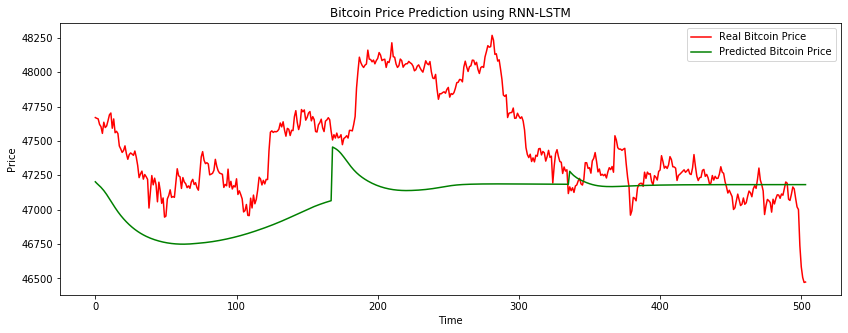

In [105]:
plt.figure(figsize=(14,5))
plt.plot(np.array(real[:,0]).flat, color = 'red', label = 'Real Bitcoin Price')
plt.plot(np.array(pred).flat, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1]:
realData = real[:,0]
predictData = np.array(pred)[:,0]
realData

NameError: name 'real' is not defined

0.2824


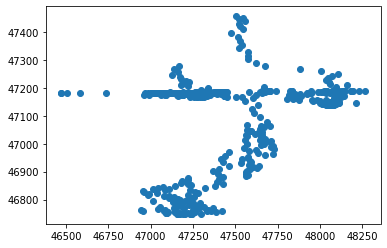

In [111]:
r_d_s = pd.Series(realData)
p_d_s = pd.Series(predictData)

corr_bitcoin = round(r_d_s.corr(p_d_s),4)

print(corr_bitcoin)

plt.scatter(realData,predictData)
plt.show()

In [65]:
type(realData)

numpy.ndarray

In [67]:
tarr = np.array(pred)

In [68]:
tarr

array([[47202.562],
       [47191.793],
       [47182.32 ],
       [47172.74 ],
       [47162.484],
       [47151.207],
       [47138.758],
       [47125.11 ],
       [47110.37 ],
       [47094.8  ],
       [47078.71 ],
       [47062.414],
       [47046.12 ],
       [47030.01 ],
       [47014.273],
       [46999.05 ],
       [46984.457],
       [46970.56 ],
       [46957.39 ],
       [46944.96 ],
       [46933.08 ],
       [46921.723],
       [46910.89 ],
       [46900.562],
       [46890.734],
       [46881.395],
       [46872.516],
       [46864.094],
       [46856.1  ],
       [46848.53 ],
       [46841.35 ],
       [46834.555],
       [46828.125],
       [46822.04 ],
       [46816.293],
       [46810.87 ],
       [46805.758],
       [46800.945],
       [46796.43 ],
       [46792.195],
       [46788.234],
       [46784.51 ],
       [46781.004],
       [46777.695],
       [46774.58 ],
       [46771.652],
       [46768.91 ],
       [46766.36 ],
       [46763.996],
       [46761.816],
